In [1]:
# price bins angleichen sodass anzahl beobachtungen gleich pro bin
# muss ich scalen?? 
# deal with data imbalance (negative prices)

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import MinMaxScaler, Imputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [17]:
df = pd.read_csv('dataset_clean.csv')

In [18]:
df.columns

Index(['Unnamed: 0', 'price', 'res_load', 'temp', 'wind', 'gen_total',
       'gen_bio', 'gen_hyd', 'gen_windoff', 'gen_windon', 'gen_pv',
       'gen_reother', 'gen_nuc', 'gen_bcoal', 'gen_hcoal', 'gen_gas',
       'gen_pump', 'gen_other', 'gen_f_total', 'gen_f_windoff', 'gen_f_windon',
       'gen_f_pv', 'gen_f_other', 'dm', 'dm_f', 'netex', 'mres+', 'mres-',
       'sres+', 'sres-', 'FF', 'PEGAS DE M1 DAILY EGIX',
       'API4 front year, USD/t', 'gen_delta', 'gen_windoff_delta',
       'gen_windon_delta', 'gen_pv_delta', 'dm_delta', 'dm_gen_delta',
       'dm_gen_ratio', 'day', 'weekend', 'month', 'season', 'hour', 'peak',
       'lag1', 'price_change', 'price_diff', 'price_diff_pos', 'price_pos',
       'price_diff_bins'],
      dtype='object')

In [19]:
X1 = df[['res_load', 'temp', 'wind', 'gen_total',
       'gen_bio', 'gen_hyd', 'gen_windoff', 'gen_windon',
       'gen_reother', 'gen_nuc', 'gen_bcoal', 'gen_hcoal', 'gen_gas',
       'gen_pump', 'gen_other', 'gen_f_total', 'gen_f_windoff', 'gen_f_windon',
       'gen_f_other', 'dm', 'dm_f', 'netex', 'mres+', 'mres-',
       'FF', 'PEGAS DE M1 DAILY EGIX',
       'API4 front year, USD/t', 'gen_delta', 'gen_windoff_delta',
       'gen_windon_delta', 'dm_delta', 'dm_gen_delta',
       'dm_gen_ratio', 'weekend', 'month', 'hour']]

In [20]:
X = X1
y = df.price_pos

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [21]:
scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
logit = LogisticRegression(C = 0.0001, class_weight='balanced')
logit.fit(X_train, y_train)

/Users/lennartjunge/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred_logp = logit.predict_proba(X_test)[:, 1]
y_pred_logp

array([0.50046809, 0.5009743 , 0.50080093, 0.50156241, 0.50007346,
       0.50127619, 0.50055599, 0.50027317, 0.50019429, 0.50065586,
       0.49992688, 0.50046407, 0.49982728, 0.50013675, 0.50098977,
       0.50011772, 0.50186779, 0.50113087, 0.50039758, 0.50048017,
       0.50072454, 0.5010418 , 0.50009736, 0.50055618, 0.5003352 ,
       0.5003236 , 0.50106778, 0.50015888, 0.50090372, 0.49997887,
       0.50019944, 0.50079855, 0.50103523, 0.50072886, 0.50136676,
       0.50093204, 0.50090039, 0.50016391, 0.50039001, 0.49990023,
       0.50098284, 0.50046008, 0.49976347, 0.49965678, 0.50079593,
       0.50146095, 0.50067259, 0.50007217, 0.49996251, 0.49991559,
       0.50002301, 0.50021758, 0.50054945, 0.50034734, 0.50068732,
       0.5007648 , 0.50099871, 0.50100336, 0.50069128, 0.50170589,
       0.50107228, 0.50070662, 0.50107265, 0.50110164, 0.50055994,
       0.50045729, 0.50045364, 0.49981049, 0.50081405, 0.50036703,
       0.50001502, 0.50036162, 0.50084918, 0.50066441, 0.50056

In [24]:
y_pred_log = logit.predict(X_test)
y_pred_log

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [25]:
confusion_matrix(y_test, y_pred_log)

array([[ 75, 441],
       [ 24, 438]])

In [26]:
print( accuracy_score(y_test, y_pred_log) )

0.5245398773006135


In [27]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.76      0.15      0.24       516
           1       0.50      0.95      0.65       462

    accuracy                           0.52       978
   macro avg       0.63      0.55      0.45       978
weighted avg       0.64      0.52      0.44       978



Text(0.5, 1.0, 'Confusion matrix for Random Forest Classifier')

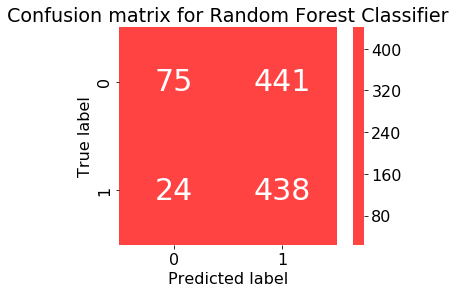

In [28]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16)

colors = ['k', '#FF4343']
colors_r = ['#FF4343', 'k', '#FF4343', 'k']

plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, annot_kws={"size":30}, cmap=colors_r, center=1800, square=True, fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Random Forest Classifier')